In [15]:
#ensembling
from mlxtend.classifier import StackingCVClassifier
import numpy as np
import pandas as pd
import sys, os, glob
import imp
import seaborn as sns
sys.path.append('./src/')
import my_ensembler, feature_utils, defines

In [5]:
X_plane,y_plane,groups_plane = feature_utils.pack_all_doc_sentences(per_par=True)

4 doc 132 paragraphes packed
11 doc 121 paragraphes packed
30 doc 82 paragraphes packed
25 doc 122 paragraphes packed
58 doc 387 paragraphes packed
46 doc 201 paragraphes packed
53 doc 149 paragraphes packed
40 doc 149 paragraphes packed
55 doc 252 paragraphes packed
61 doc 435 paragraphes packed
9 doc 66 paragraphes packed
36 doc 88 paragraphes packed
23 doc 74 paragraphes packed
2 doc 156 paragraphes packed
17 doc 324 paragraphes packed
28 doc 167 paragraphes packed
31 doc 79 paragraphes packed
24 doc 161 paragraphes packed
5 doc 66 paragraphes packed
10 doc 124 paragraphes packed
47 doc 161 paragraphes packed
52 doc 275 paragraphes packed
59 doc 371 paragraphes packed
60 doc 247 paragraphes packed
41 doc 137 paragraphes packed
54 doc 243 paragraphes packed
29 doc 105 paragraphes packed
3 doc 113 paragraphes packed
16 doc 102 paragraphes packed
37 doc 101 paragraphes packed
22 doc 89 paragraphes packed
8 doc 82 paragraphes packed
51 doc 210 paragraphes packed
44 doc 202 paragraphes p

In [6]:
X_shaped,y_shaped,groups_shaped= feature_utils.reshape_doc_paragraphs_to_sequence(X_plane,y_plane,groups_plane,3,3)

doc paragraphs reshaped: from 10515 to 3505


In [ ]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    [
    ('crf', 
      crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True,
    )),
#      ('alephbert',
#       #loadmodel
#      ),
#         ('hebert',
#         #loadmodel
#         )
    ('knn', KNeighborsClassifier())
    ],
    voting='soft')
voting.fit(X_train, y_train)
lr, tree = voting.estimators_
tree.score(X_test, y_test), lr.score(X_test, y_test), voting.score(X_test, y_test)

### Prepare data for KNN

In [38]:
def concat_vectors(dim = 300):
    X_vec = pd.DataFrame()
    y_vec = pd.Series(dtype=int)
    doc_list = glob.glob(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"*_sent_vec{}_db.csv".format(dim)))
    doc_list.sort()
    for i,doc in enumerate(doc_list):
        doc_idx = feature_utils.get_doc_idx_from_name(doc)
        sent_vec_db = pd.read_csv(doc)
        sent_db =  pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"{:02d}_sent_db.csv".format(doc_idx)),usecols=['is_nar'])
        y_vec = pd.concat([y_vec,sent_db['is_nar']],ignore_index=True)
        X_vec = pd.concat([X_vec,sent_vec_db],ignore_index=True)
    return X_vec,y_vec

In [39]:
X_vec,y_vec =concat_vectors()

In [40]:
X_vec

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.029905,0.038024,0.000409,-0.002114,-0.001024,-0.023301,0.052745,0.006430,-0.046377,0.020095,...,0.014652,0.000285,-0.035123,-0.030111,-0.027191,0.026381,0.005289,0.005408,-0.020530,0.001053
1,0.044579,0.024742,0.028893,-0.060388,0.039829,0.025243,-0.117620,-0.028324,0.013425,-0.002992,...,0.009427,0.038958,-0.027126,-0.003454,-0.037883,0.018410,0.046375,0.052125,-0.023152,0.060160
2,-0.085588,0.067969,0.007988,0.032841,-0.052474,-0.082648,0.003187,0.004346,-0.054798,0.033916,...,0.015144,0.047520,0.017374,0.017066,-0.094182,-0.041293,-0.041231,-0.052368,0.037051,-0.036378
3,-0.114521,0.000108,0.036471,-0.024207,0.002051,0.014730,-0.104159,0.058651,0.005404,0.056529,...,-0.028992,0.024537,-0.002414,0.039244,-0.094238,0.025045,0.097398,-0.004409,0.041561,-0.049388
4,0.036749,0.012629,-0.027156,-0.004715,-0.005032,0.006106,-0.031141,-0.070769,-0.020561,0.019293,...,0.034837,-0.046828,0.011486,-0.009508,-0.058013,0.021407,-0.048019,-0.067683,-0.061374,-0.075125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33231,0.000403,0.030761,0.006861,0.004358,0.004020,-0.034013,-0.000644,0.006724,-0.025179,0.023791,...,-0.004880,0.018460,-0.012988,-0.015199,0.007455,0.018707,0.010102,0.018673,-0.018850,-0.015083
33232,0.005242,0.025412,0.033902,0.024731,-0.006604,0.030173,-0.049072,0.008212,-0.030461,-0.011216,...,0.003355,-0.001061,-0.019386,0.016321,-0.066378,0.016374,0.000689,0.015705,0.017209,0.015820
33233,-0.000916,0.064209,-0.006212,-0.010558,-0.056428,-0.062275,-0.031020,0.041746,-0.062375,0.090405,...,-0.031854,-0.019589,-0.008862,0.013844,-0.076933,-0.032281,-0.060818,-0.041205,-0.029383,-0.056909
33234,0.048067,0.013103,-0.032234,-0.009326,-0.017668,-0.028665,0.105883,-0.009100,-0.036032,-0.006796,...,-0.016274,-0.000202,0.001330,0.031665,-0.035877,0.018119,0.033564,-0.041964,-0.011305,0.029903


In [41]:
y_vec

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
33231    0.0
33232    0.0
33233    0.0
33234    0.0
33235    0.0
Length: 33236, dtype: float64

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vec, y_vec, test_size=0.33, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [45]:
y_pred = knn.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.74      0.86      0.80      7570
         1.0       0.52      0.33      0.40      3398

    accuracy                           0.70     10968
   macro avg       0.63      0.60      0.60     10968
weighted avg       0.67      0.70      0.67     10968



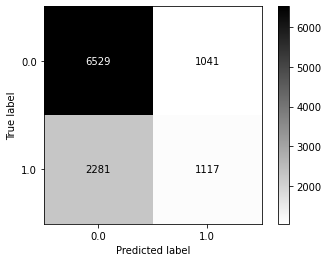

In [47]:
feature_utils.get_prediction_report(y_test,y_pred,knn.classes_)

In [ ]:
estimators={}
estimators['crf'] = {}
estimators['crf']['mod'] = 

In [ ]:
crf=estimators['crf']['mod']
alephbert=estimators['alephbert']['mod']
hebert=estimators['hebert']['mod']

In [ ]:
classifiers = [crf,alephbert,hebert]
scv=my_ensembler.ensemble()

# scv.fit(X_train,y_train)
# scv_predicted = scv.predict(X_test)
# scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
# scv_acc_score = accuracy_score(y_test, scv_predicted)
# print("confussion matrix")
# print(scv_conf_matrix)
# print("\n")
# print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
# print(classification_report(y_test,scv_predicted))